## Ridge and LAsso Regression implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()

In [2]:
pd.set_option('display.max_columns',500)

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Aim:-  The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

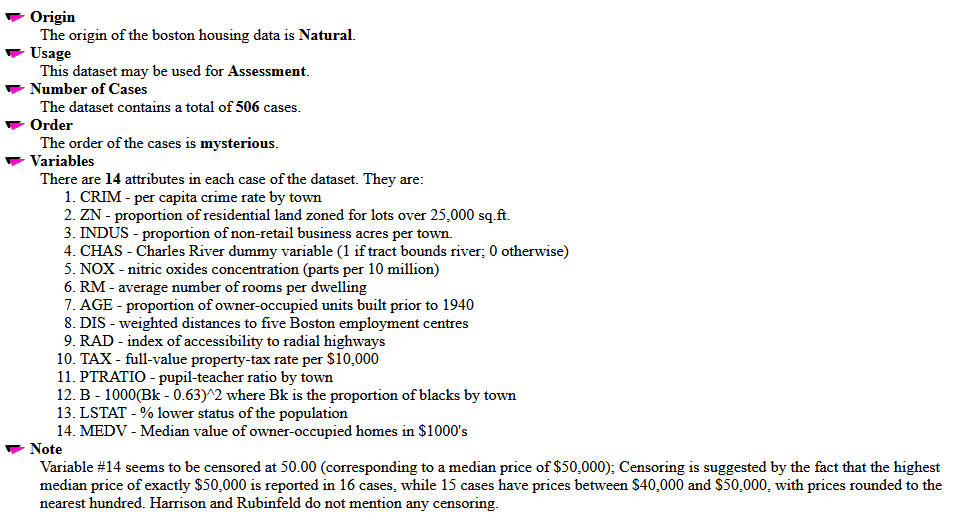

In [ ]:
df.shape

In [ ]:
#df.info()

In [ ]:
# check null 
#df.isnull().sum()

In [ ]:
#df.describe()

In [ ]:
#sns.pairplot(df)

In [ ]:
'''for feature in df.columns:
    plt.figure(figsize=(20,10))
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.title(f'Distribution of {feature}')
    plt.show()
    '''

In [ ]:
df.corr()

In [ ]:
#plt.figure(figsize=(10,6))
#sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [ ]:
#df.drop('tax', axis=1, inplace=True)

In [ ]:
df.columns
#print(len(df.columns))

In [ ]:
# Objectibe a perform a feature selection technique.

This is a regression problem so regression technique for feaure selection are 

Types of Feature Selection Methods in ML

1. Filter Methods
2. Wrapper Methods
3. Embedded Methods

Filter Methods:- 
1. chisquare
2. correlation method we will study this two method.

 ## chisquare
In feature selection, we aim to select the features which are highly dependent on the response.

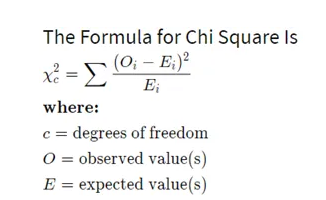

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [ ]:
# split the data in to x and y

In [4]:
X = df.drop('medv',axis=1)
y=df['medv']

In [ ]:
#df.head()

In [ ]:
print(df.shape)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X.columns

In [ ]:
#y.head()

In [ ]:
#X = pd.DataFrame(X,columns=X.columns)

In [ ]:
df['medv']

In [ ]:
from sklearn.feature_selection import SelectKBest,
from sklearn.feature_selection import chi2
selector = SelectKBest(score_func=chi2,k=7)
X_best = selector.fit_transform(X,y)

In [ ]:
# Note Chisquare method is use in classification model to select feature.

In [ ]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

In [ ]:
# Getting the selected feature names
selected_features = X.columns[selector.get_support(indices=True)].tolist()

# Printing the selected feature names
print("Selected Features:")

# correlation method;-

In [ ]:
corr_matrix = df.corr()

In [ ]:
corr_matrix

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)

In [ ]:
abs(corr_matrix["medv"]) # corelation w.r.t.  target feature.

In [ ]:
threshold = 0.5
high_corr_features = corr_matrix[abs(corr_matrix['medv']) > threshold]

In [ ]:
high_corr_features # they are heighly corelated with target variable hence we will use this corelation between selected independent feature.

In [ ]:
df1 = df[["rm","ptratio","lstat"]]

In [ ]:
df1.corr()

From the above code, it is seen that the variables RM and LSTAT are highly correlated with each other (-0.613808). Hence we would keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.

After dropping RM, we are left with two feature, LSTAT and PTRATIO. These are the final features given by Pearson correlation.

In [ ]:
X = df[["lstat",'ptratio']]# independent features
y=df['medv']# dependent features

## Linear Regression


In [5]:
# standarization of variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [6]:
#  Split the data into training/testing sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,test_size=0.3)

In [8]:
X_train.shape

(354, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1, positive=True)

The n_jobs parameter in scikit-learn's LinearRegression class allows us to specify the number of CPU cores to use during the computation. By setting n_jobs to -1, scikit-learn will utilize all available CPU cores, 

In [ ]:
# Train the model using the training sets

reg.fit(X_train,y_train)

In [ ]:
# Make predictions using the testing set
pred_Y=reg.predict(X_test)

In [ ]:
# The coefficients
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
reg.score(X_train,y_train)

In [ ]:
# The mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,pred_Y)

In [ ]:
r2_score(y_test,pred_Y)

In [9]:
# perform normally :-  including all Xi
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1, positive=True)
# Train the model using the training sets
reg.fit(X_train,y_train)
# Make predictions using the testing set
pred_Y=reg.predict(X_test)
# The coefficients
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train,y_train))
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,pred_Y))
print(r2_score(y_test,pred_Y))

[0.         1.25991937 0.         0.90996552 0.         5.74546183
 0.         0.         0.         0.         0.         1.94700654
 0.        ]
22.38968886172032
0.576235606453672
31.756459864274206
0.5502793711008869


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769923


In [ ]:
# ok till here is cleare .. plot ko cleare krna hai

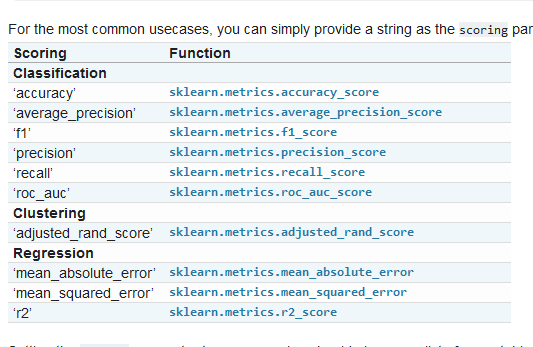

## Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [12]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540354


## Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.760e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.210e+03, toler

{'alpha': 1}
-35.53158022069486


In [ ]:
# Elasticnet 

In [16]:
# Importing the required libraries
from sklearn.linear_model import ElasticNet
model = ElasticNet()
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
Elsdticnet_regressor = GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
Elsdticnet_regressor.fit(X,y)
print(Elsdticnet_regressor.best_params_)
print(Elsdticnet_regressor.best_score_)

C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.872e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.032e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ramdas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.239e+03, toler

{'alpha': 1}
-32.05368976651792


In [ ]:
So by comaring we can say ridge rigression perform better then other models